In [1]:
import numpy as np
import pandas as pd
from library.constants import *
import io, base64
import matplotlib.pyplot as plt
import json
import math

SIMPLIFIED_JOINTS = ["Head", "Neck", "Left Upper Arm", "Right Upper Arm", "Left Forearm", "Right Forearm",
                     "Left Hand", "Right Hand", "Pelvis", "Left Upper Leg", "Right Upper Leg",
                     "Left Lower Leg", "Right Lower Leg", "Left Foot", "Right Foot"]

SKELETON_CONNECTION_MAP = [["Head", "Neck"],
                           ["Neck", "Left Upper Arm"],
                           ["Left Upper Arm", "Left Forearm"],
                           ["Left Forearm", "Left Hand"],
                           ["Neck", "Right Upper Arm"],
                           ["Right Upper Arm", "Right Forearm"],
                           ["Right Forearm", "Right Hand"],
                           ["Neck", "Pelvis"],
                           ["Pelvis", "Left Upper Leg"],
                           ["Left Upper Leg", "Left Lower Leg"],
                           ["Left Lower Leg", "Left Foot"],
                           ["Pelvis", "Right Upper Leg"],
                           ["Right Upper Leg", "Right Lower Leg"],
                           ["Right Lower Leg", "Right Foot"]]

used_cols = []
for joints in SIMPLIFIED_JOINTS:
    used_cols.append(joints + " x")
    used_cols.append(joints + " y")
    used_cols.append(joints + " z")
used_cols += ["Frame"]


# DATA_PATH = "C:\\Users\\gaoch\\MA\\Badminton weights\\P02_B\\"
# motion_recording = read_data("P02_B_noweightwithgloves.xlsx")


motion_recording = pd.read_excel("C:/Users/gaoch/MA/Badminton weights/P02_B/P02_B_withweightwithloves.xlsx",
                         sheet_name=RECORDING_TYPES,
                         usecols=used_cols)


In [2]:
all_path = OUTPUT_FOLDER + "data.xlsx"
with pd.ExcelWriter(all_path) as writer:
    for recoding_type in RECORDING_TYPES:
        motion_recording[recoding_type][15800:16800].to_excel(writer, sheet_name=recoding_type, index=False)


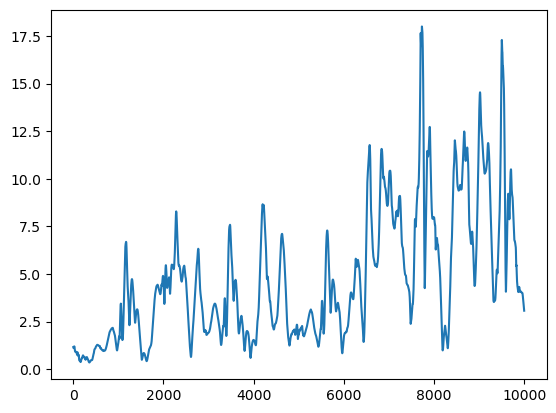

In [15]:
def calculate_norm(row):
    return np.linalg.norm(row.values)

recording_chart = pd.DataFrame()
recording_without_frame = motion_recording["Segment Velocity"].loc[:,
                          motion_recording["Segment Velocity"].columns != "Frame"]

recording_chart_sum = pd.DataFrame()
for i in range(0, recording_without_frame.shape[1], 3):
    columns = recording_without_frame.iloc[:, i:i + 3]
    recording_chart_sum[f'Norm_{i // 3 + 1}'] = columns.apply(calculate_norm, axis=1)

recording_chart["Sum"] = recording_chart_sum.sum(axis=1)
recording_chart["Frame"] = motion_recording["Segment Velocity"]["Frame"]
plt.plot(recording_chart["Frame"],recording_chart["Sum"])

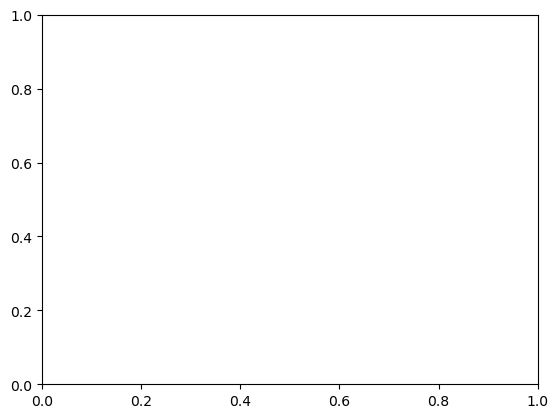

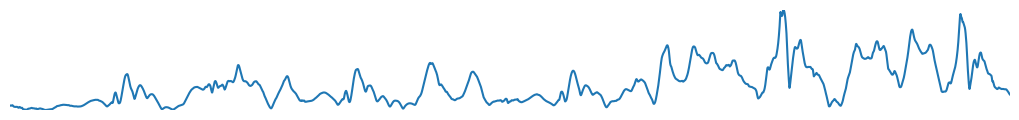

In [16]:
fig, ax = plt.subplots()
# ax.spines.set_visible(False)
# ax.spines['top'].set_visible(False)
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.plot(recording_chart["Frame"], recording_chart["Sum"])

my_stringIObytes = io.BytesIO()
plt.savefig(my_stringIObytes, format='jpg')
my_stringIObytes.seek(0)
my_base64_jpgData = base64.b64encode(my_stringIObytes.read()).decode()

all_info = {"start": int(motion_recording["Segment Position"].iloc[0]["Frame"]),
            "end": int(motion_recording["Segment Position"].iloc[-1]["Frame"]),
            "image": my_base64_jpgData}
file_path = "data.json"
# Open the file in write mode
with open(file_path, "w") as json_file:
    json.dump(all_info, json_file)

# plt.savefig(OUTPUT_FOLDER + '\\test.png')
# plt.show()

In [9]:
all_path = OUTPUT_FOLDER + "data.xlsx"
with pd.ExcelWriter(all_path) as writer:
    for recoding_type in RECORDING_TYPES:
        motion_recording[recoding_type][7600:7850].to_excel(writer, sheet_name=recoding_type, index=False)

In [ ]:
print(motion_recording.keys())
